<a href="https://colab.research.google.com/github/Swinalwaghmare/Computer-vision-CNN/blob/main/Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Edge Detection

In [1]:
import numpy as np
import cv2

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)
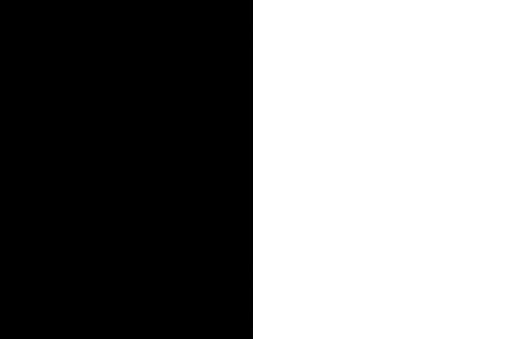

In [2]:
image_path = '/content/Image.jpg'

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

image

In [3]:
sobel_vertical = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

sobel_vertical

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [4]:
# 307 X 509
image.shape

(339, 509)

In [5]:
rows, cols = image.shape
rows, cols

(339, 509)

In [6]:
k = sobel_vertical.shape[0]
k

3

In [7]:
output_metrics = np.zeros((rows-k+1, cols-k+1))
output_metrics

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
output_metrics.shape

(337, 507)

In [9]:
for i in range(1, rows-1):
  for j in range(1, cols-1):
    region = image[i-1:i+2, j-1:j+2]
    output_metrics[i-1, j-1] = np.sum(region * sobel_vertical)

In [10]:
import matplotlib.pyplot as plt

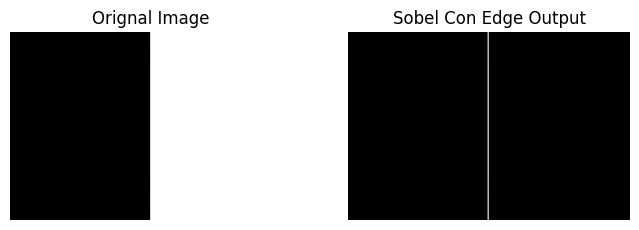

In [11]:
plt.figure(figsize=(8,9))

# Orignal Image
plt.subplot(1,2,1)
plt.title("Orignal Image")
plt.imshow(image, cmap='grey')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Sobel Con Edge Output")
plt.imshow(output_metrics, cmap='grey')
plt.axis('off')

plt.show()

### Using CV2

In [12]:
sobel_output = cv2.filter2D(image, -1, sobel_vertical)
sobel_output.shape

(339, 509)

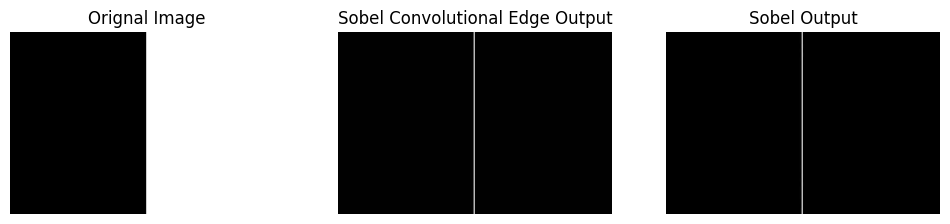

In [13]:
plt.figure(figsize=(12,9))

# Orignal Image
plt.subplot(1,3,1)
plt.title("Orignal Image")
plt.imshow(image, cmap='grey')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Sobel Convolutional Edge Output")
plt.imshow(output_metrics, cmap='grey')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Sobel Output")
plt.imshow(sobel_output, cmap='grey')
plt.axis('off')

plt.show()

### Trying Horizontal Kernel on the Vertical Image

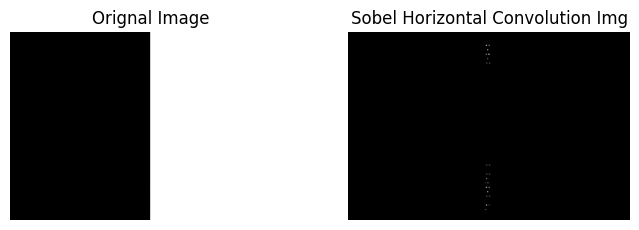

In [14]:
image_path = '/content/Image.jpg'

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

sobel_horizontal = np.array([[+1, +2, +1],
                             [0, 0, 0],
                             [-1, -2, -1]])

sobel_output_hor = cv2.filter2D(image, -1, sobel_horizontal)

plt.figure(figsize=(8,9))

# Orignal Image
plt.subplot(1,2,1)
plt.title("Orignal Image")
plt.imshow(image, cmap='grey')
plt.axis('off')

# Sobel Output Image
plt.subplot(1,2,2)
plt.title("Sobel Horizontal Convolution Img")
plt.imshow(sobel_output_hor, cmap='grey')
plt.axis('off')

plt.show()

### Trying the different kernel on image

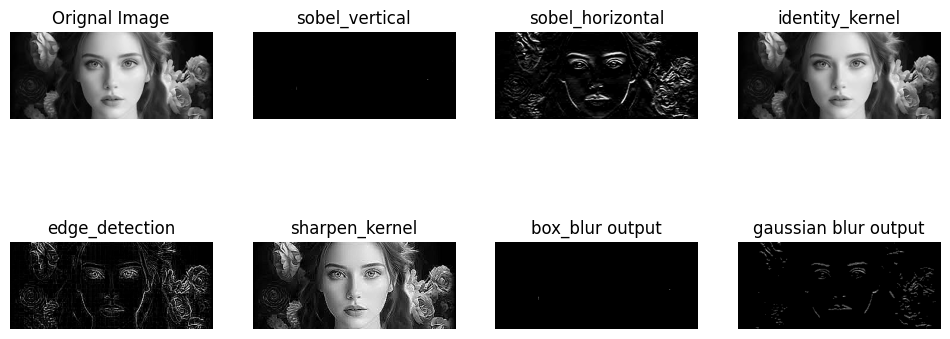

In [15]:
image_path = '/content/images.jpg'

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

sobel_vertical = np.array([[-1, 0, +1],
                           [-2, 0, -2],
                           [-1, 0, -1]])

sobel_horizontal = np.array([[+1, +2, +1],
                             [0, 0, 0],
                             [-1, -2, -1]])

identity_kernel = np.array([[0, 0, 0],
                            [0, 1, 0],
                            [0, 0, 0]])

edge_detection = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])

sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

box_blur = np.dot(1/9, np.array([[-1, 0, +1],
                           [-2, 0, -2],
                           [-1, 0, -1]]))

gaussian_blur =np.dot(1/256 , np.array([[+1, +2, +1],
                             [0, 0, 0],
                             [-1, -2, -1]]))

sobel_vertical_output = cv2.filter2D(image, -1, sobel_vertical)

sobel_horizontal_output = cv2.filter2D(image, -1, sobel_horizontal)

identity_kernel_output = cv2.filter2D(image, -1, identity_kernel)

edge_detection_output = cv2.filter2D(image, -1, edge_detection)

sharpen_kernel_output = cv2.filter2D(image, -1, sharpen_kernel)

box_blur_output = cv2.filter2D(image, -1, box_blur)

gaussian_blur_output = cv2.filter2D(image, -1, gaussian_blur)

plt.figure(figsize=(12,5))

plt.subplot(2,4,1)
plt.title('Orignal Image')
plt.imshow(image, cmap='grey')
plt.axis('off')

plt.subplot(2,4,2)
plt.title('sobel_vertical')
plt.imshow(sobel_vertical_output, cmap='grey')
plt.axis('off')

plt.subplot(2,4,3)
plt.title('sobel_horizontal')
plt.imshow(sobel_horizontal_output, cmap='grey')
plt.axis('off')

plt.subplot(2,4,4)
plt.title('identity_kernel')
plt.imshow(identity_kernel_output, cmap='grey')
plt.axis('off')

plt.subplot(2,4,5)
plt.title('edge_detection')
plt.imshow(edge_detection_output, cmap='grey')
plt.axis('off')

plt.subplot(2,4,6)
plt.title('sharpen_kernel')
plt.imshow(sharpen_kernel_output, cmap='grey')
plt.axis('off')

plt.subplot(2,4,7)
plt.title('box_blur output')
plt.imshow(box_blur_output, cmap='grey')
plt.axis('off')

plt.subplot(2,4,8)
plt.title('gaussian blur output')
plt.imshow(gaussian_blur_output, cmap='grey')
plt.axis('off')

plt.show()